# Análisis exploratorio 🕵️

## Importaciones ⬇️

In [110]:
from ucimlrepo import fetch_ucirepo # Fetches the dataset from the UCI repository
import pandas as pd # Data manipulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.pipeline import make_pipeline

Obtenemos el dataframe desde los recursos en forma del módulo suguerido en la documentación.

In [111]:
# fetch dataset 
cervical_cancer_risk_factors = fetch_ucirepo(id=383) 
  
# data (as pandas dataframes) 
X = cervical_cancer_risk_factors.data.features 

# Pass X into a csv file
X.to_csv('cervical_cancer_risk_factors.csv', index=False)
# Load the data
X = pd.read_csv('cervical_cancer_risk_factors.csv')

# Descripción de las variables

1. **Age:** Cuantitativa discreta
2. **Number.of.sexual.partners:** Cuantitativa discreta
3. **First.sexual.intercourse:** Cuantitativa discreta
4. **Num.of.pregnancies:** Cuantitativa discreta
5. **Smokes:** Cualitativa
6. **Smokes.years:** Cuantitativa continua
7. **Smokes.packs.per.year:** Cuantitativa continua
8. **Hormonal.Contraceptives:** Cualitativa
9. **Hormonal.Contraceptives.years:** Cuantitativa continua
10. **IUD:** Cualitativa
11. **IUD.years:** Cuantitativa continua
12. **STDs:** Cualitativa
13. **STDs.number:** Cuantitativa discreta
14. **STDs.condylomatosis:** Cualitativa (dicotómica)
15. **STDs.cervical.condylomatosis:** Cualitativa
16. **STDs.vaginal.condylomatosis:** Cualitativa
17. **STDs.vulvo.perineal.condylomatosis:** Cualitativa
18. **STDs.syphilis:** Cualitativa
19. **STDs.pelvic.inflammatory.disease:** Cualitativa
20. **STDs.genital.herpes:** Cualitativa
21. **STDs.molluscum.contagiosum:** Cualitativa
22. **STDs.AIDS:** Cualitativa
23. **STDs.HIV:** Cualitativa
24. **STDs.Hepatitis.B:** Cualitativa
25. **STDs.HPV:** Cualitativa
26. **STDs.Number.of.diagnosis:** Cuantitativa discreta
27. **STDs.Time.since.first.diagnosis:** Cuantitativa continua
28. **STDs.Time.since.last.diagnosis:** Cuantitativa continua
29. **Dx.Cancer:** Cualitativa
30. **Dx.CIN:** Cualitativa
31. **Dx.HPV:** Cualitativa
32. **Dx:** Cualitativa
33. **Hinselmann:** Cualitativa
34. **Schiller:** Cualitativa
35. **Citology:** Cualitativa
36. **Biopsy:** Cualitativa


## Rápido análisis exploratorio

In [112]:
# Información general del dataframe
print(X.info())

# Estadísticas descriptivas
print(X.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

### Evaluamos los nulos o valores vacios

In [113]:
# Create Frequency Table for categorical columns
for col in X:
    data = {}
    for val in X[col]:
        if val in data:
            data[val] += 1
        else:
            data[val] = 1

    # Sort the data
    data = dict(sorted(data.items(), key=lambda item: item[1], reverse=True))

    # Calculate Frequency on percentage
    total = sum(data.values())
    for key in data:
        percentaje = round((data[key] / total) * 100, 2)
        # Use only 2 decimal places
        data[key] = f"{data[key]} ({percentaje:2}%)"


    data = pd.DataFrame(data.items(), columns=[col, 'FREQUENCY'])
    data = data.reset_index(drop=True)
    data = data.head(5)
    # Print Column Name
    styler = data.style.set_table_styles([
        {'selector': 'th', 'props': [('font-weight', 'bold')]}
    ])
    display(styler)

,Age,FREQUENCY
0,23,54 (6.29%)
1,18,50 (5.83%)
2,21,46 (5.36%)
3,20,45 (5.24%)
4,19,44 (5.13%)


,Number of sexual partners,FREQUENCY
0,2.000000,272 (31.7%)
1,3.000000,208 (24.24%)
2,1.000000,206 (24.01%)
3,4.000000,78 (9.09%)
4,5.000000,44 (5.13%)


,First sexual intercourse,FREQUENCY
0,15.000000,163 (19.0%)
1,17.000000,151 (17.6%)
2,18.000000,137 (15.97%)
3,16.000000,121 (14.1%)
4,14.000000,79 (9.21%)


,Num of pregnancies,FREQUENCY
0,1.000000,270 (31.47%)
1,2.000000,240 (27.97%)
2,3.000000,139 (16.2%)
3,4.000000,74 (8.62%)
4,5.000000,35 (4.08%)


,Smokes,FREQUENCY
0,0.000000,722 (84.15%)
1,1.000000,123 (14.34%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,Smokes (years),FREQUENCY
0,0.000000,722 (84.15%)
1,1.266973,15 (1.75%)
2,9.000000,9 (1.05%)
3,5.000000,9 (1.05%)
4,1.000000,8 (0.93%)


,Smokes (packs/year),FREQUENCY
0,0.000000,722 (84.15%)
1,0.513202,18 (2.1%)
2,1.000000,6 (0.7%)
3,3.000000,5 (0.58%)
4,2.000000,4 (0.47%)


,Hormonal Contraceptives,FREQUENCY
0,1.000000,481 (56.06%)
1,0.000000,269 (31.35%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,Hormonal Contraceptives (years),FREQUENCY
0,0.000000,269 (31.35%)
1,1.000000,77 (8.97%)
2,0.250000,41 (4.78%)
3,2.000000,40 (4.66%)
4,3.000000,39 (4.55%)


,IUD,FREQUENCY
0,0.000000,658 (76.69%)
1,1.000000,83 (9.67%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,IUD (years),FREQUENCY
0,0.000000,658 (76.69%)
1,3.000000,11 (1.28%)
2,2.000000,10 (1.17%)
3,5.000000,9 (1.05%)
4,1.000000,8 (0.93%)


,STDs,FREQUENCY
0,0.000000,674 (78.55%)
1,1.000000,79 (9.21%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs (number),FREQUENCY
0,0.000000,674 (78.55%)
1,2.000000,37 (4.31%)
2,1.000000,34 (3.96%)
3,3.000000,7 (0.82%)
4,nan,1 (0.12%)


,STDs:condylomatosis,FREQUENCY
0,0.000000,709 (82.63%)
1,1.000000,44 (5.13%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:cervical condylomatosis,FREQUENCY
0,0.000000,753 (87.76%)
1,nan,1 (0.12%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:vaginal condylomatosis,FREQUENCY
0,0.000000,749 (87.3%)
1,1.000000,4 (0.47%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:vulvo-perineal condylomatosis,FREQUENCY
0,0.000000,710 (82.75%)
1,1.000000,43 (5.01%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:syphilis,FREQUENCY
0,0.000000,735 (85.66%)
1,1.000000,18 (2.1%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:pelvic inflammatory disease,FREQUENCY
0,0.000000,752 (87.65%)
1,nan,1 (0.12%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:genital herpes,FREQUENCY
0,0.000000,752 (87.65%)
1,nan,1 (0.12%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:molluscum contagiosum,FREQUENCY
0,0.000000,752 (87.65%)
1,nan,1 (0.12%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:AIDS,FREQUENCY
0,0.000000,753 (87.76%)
1,nan,1 (0.12%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:HIV,FREQUENCY
0,0.000000,735 (85.66%)
1,1.000000,18 (2.1%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:Hepatitis B,FREQUENCY
0,0.000000,752 (87.65%)
1,nan,1 (0.12%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs:HPV,FREQUENCY
0,0.000000,751 (87.53%)
1,1.000000,2 (0.23%)
2,nan,1 (0.12%)
3,nan,1 (0.12%)
4,nan,1 (0.12%)


,STDs: Number of diagnosis,FREQUENCY
0,0,787 (91.72%)
1,1,68 (7.93%)
2,2,2 (0.23%)
3,3,1 (0.12%)


,STDs: Time since first diagnosis,FREQUENCY
0,1.000000,15 (1.75%)
1,3.000000,10 (1.17%)
2,2.000000,9 (1.05%)
3,4.000000,6 (0.7%)
4,7.000000,5 (0.58%)


,STDs: Time since last diagnosis,FREQUENCY
0,1.000000,17 (1.98%)
1,2.000000,10 (1.17%)
2,3.000000,9 (1.05%)
3,4.000000,6 (0.7%)
4,7.000000,5 (0.58%)


,Dx:Cancer,FREQUENCY
0,0,840 (97.9%)
1,1,18 (2.1%)


,Dx:CIN,FREQUENCY
0,0,849 (98.95%)
1,1,9 (1.05%)


,Dx:HPV,FREQUENCY
0,0,840 (97.9%)
1,1,18 (2.1%)


,Dx,FREQUENCY
0,0,834 (97.2%)
1,1,24 (2.8%)


,Hinselmann,FREQUENCY
0,0,823 (95.92%)
1,1,35 (4.08%)


,Schiller,FREQUENCY
0,0,784 (91.38%)
1,1,74 (8.62%)


,Citology,FREQUENCY
0,0,814 (94.87%)
1,1,44 (5.13%)


,Biopsy,FREQUENCY
0,0,803 (93.59%)
1,1,55 (6.41%)


## Evaluación de los Valores Nulos

Se encontró que las filas con al menos un valor nulo o vacío dentro del dataset representan al menos un 93% del dataset. Por ende es muy poco viable eliminar esa parte de la data. Se prefirió entonces rellenar los valores nulos con la moda o la mediana en cada columna. 



NaN values for each column:


,COLUMN,MISSING DATA
0,Age,0 (0.00%)
1,Number of sexual partners,26 (3.03%)
2,First sexual intercourse,7 (0.82%)
3,Num of pregnancies,56 (6.53%)
4,Smokes,13 (1.52%)
5,Smokes (years),13 (1.52%)
6,Smokes (packs/year),13 (1.52%)
7,Hormonal Contraceptives,108 (12.59%)
8,Hormonal Contraceptives (years),108 (12.59%)
9,IUD,117 (13.64%)




Total NaN rows:  799 858
Percentage of missing data:  93.12354312354313


Total NaN rows: 799 NaN values, 93.12% missing data


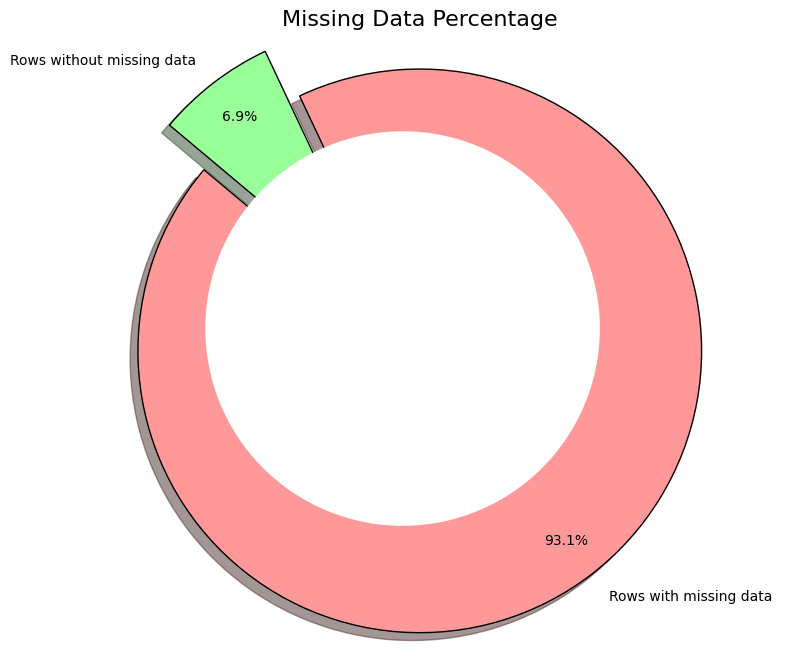

In [114]:
# Count how many NaN values are for each column and percentage to represent the missing data
dataMiss = {}
print("\n\nNaN values for each column:")
for col in X.columns:
    # Change nan values to null
    X[col] = X[col].replace('?', np.nan)
    # Count NaN values
    nanValues = X[col].isnull().sum()
    # Using color blue to nan values
    nanValuesSTR = f"{nanValues}"
    # Calculate percentage of missing data
    percentage = nanValues / len(X) * 100
    # Use color Yellow for percentage
    percentageStr = f"{percentage:.2f}%"
    # Print the result
    dataMiss[col] = f"{nanValuesSTR} ({percentageStr})"
    

dataMiss = pd.DataFrame(dataMiss.items(), columns=['COLUMN', 'MISSING DATA'])
dataMiss = dataMiss.reset_index(drop=True)
styler = dataMiss.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])
display(styler)


# Count all rows with 1 or more NaN values
nanRows = X.isnull().any(axis=1).sum()
print("\n\nTotal NaN rows: ", nanRows, len(X))
print("Percentage of missing data: ", nanRows / len(X) * 100)
# Calculate percentage of missing data
percentage = nanRows / len(X) * 100
# Use color Yellow for percentage
percentageStr = f"\033[93m{percentage:.2f}%\033[0m"
# User color Red for  text Total NaN rows:
textPrint = "\033[91mTotal NaN rows:\033[0m"
# Use color blue for nan rows
nanRowsStr = f"\033[94m{nanRows}\033[0m"

# Print the result
print(f"\n\n{textPrint} {nanRowsStr} NaN values, {percentageStr} missing data")


# Diference between percentaje to total data and categorical data
percentageNotNaN = 100 - percentage
# Create a pie chart using percentage of missing data. Use percentageDiff and percentageCat
# to represent the data

# Datos para el gráfico
sizes = [percentage, percentageNotNaN]
labels = ["Rows with missing data ", "Rows without missing data"]
colorsPie = ['#ff9999','#99ff99']  # Colores personalizados
explode = (0.1, 0.1)  # "Explota" la primera y la segunda porción

plt.figure(figsize=(8, 8))  # Tamaño de la figura

# Crear el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colorsPie, autopct='%1.1f%%',
        shadow=True, startangle=140, pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

# Dibuja un círculo en el centro para hacer un "donut chart"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título
plt.title("Missing Data Percentage", fontsize=16)

# Aspect ratio para asegurar que el gráfico es circular
plt.axis('equal')  

# Mostrar el gráfico
plt.show()


In [115]:
# Variables numéricas
variables_numericas = [
    "Age",
    "Number of sexual partners",
    "First sexual intercourse",
    "Num of pregnancies",
    "Smokes (years)",
    "Smokes (packs/year)",
    "Hormonal Contraceptives (years)",
    "IUD (years)",
    "STDs (number)",
    "STDs: Number of diagnosis",
    "STDs: Time since first diagnosis",
    "STDs: Time since last diagnosis"
]

# Variables cualitativas
variables_cualitativas = [
    "Smokes",
    "Hormonal Contraceptives",
    "IUD",
    "STDs",
    "STDs:condylomatosis",
    "STDs:cervical condylomatosis",
    "STDs:vaginal condylomatosis",
    "STDs:vulvo-perineal condylomatosis",
    "STDs:syphilis",
    "STDs:pelvic inflammatory disease",
    "STDs:genital herpes",
    "STDs:molluscum contagiosum",
    "STDs:AIDS",
    "STDs:HIV",
    "STDs:Hepatitis B",
    "STDs:HPV",
    "Dx:Cancer",
    "Dx:CIN",
    "Dx:HPV",
    "Dx",
    "Hinselmann",
    "Schiller",
    "Citology",
    "Biopsy"
]

In [116]:
# Change null values to top value (not numeric columns) or median (numeric columns) in each column 
for col in X.columns:
    if col in variables_cualitativas:
        X[col] = X[col].fillna(X[col].mode()[0])
    else:
        X[col] = X[col].fillna(X[col].median())





NaN values for each column:


,COLUMN,MISSING DATA
0,Age,0 (0.00%)
1,Number of sexual partners,0 (0.00%)
2,First sexual intercourse,0 (0.00%)
3,Num of pregnancies,0 (0.00%)
4,Smokes,0 (0.00%)
5,Smokes (years),0 (0.00%)
6,Smokes (packs/year),0 (0.00%)
7,Hormonal Contraceptives,0 (0.00%)
8,Hormonal Contraceptives (years),0 (0.00%)
9,IUD,0 (0.00%)




Total NaN rows:  0 858
Percentage of missing data:  0.0


Total NaN rows: 0 NaN values, 0.00% missing data


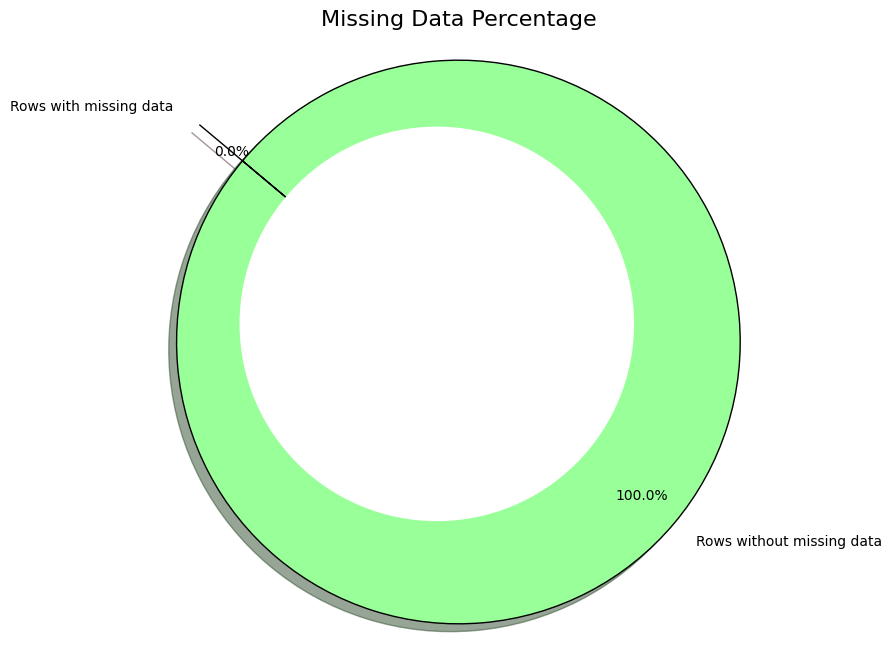

In [117]:
# Count how many NaN values are for each column and percentage to represent the missing data
dataMiss = {}
print("\n\nNaN values for each column:")
for col in X.columns:
    # Change nan values to null
    X[col] = X[col].replace('?', np.nan)
    # Count NaN values
    nanValues = X[col].isnull().sum()
    # Using color blue to nan values
    nanValuesSTR = f"{nanValues}"
    # Calculate percentage of missing data
    percentage = nanValues / len(X) * 100
    # Use color Yellow for percentage
    percentageStr = f"{percentage:.2f}%"
    # Print the result
    dataMiss[col] = f"{nanValuesSTR} ({percentageStr})"
    

dataMiss = pd.DataFrame(dataMiss.items(), columns=['COLUMN', 'MISSING DATA'])
dataMiss = dataMiss.reset_index(drop=True)
styler = dataMiss.style.set_table_styles([
    {'selector': 'th', 'props': [('font-weight', 'bold')]}
])
display(styler)


# Count all rows with 1 or more NaN values
nanRows = X.isnull().any(axis=1).sum()
print("\n\nTotal NaN rows: ", nanRows, len(X))
print("Percentage of missing data: ", nanRows / len(X) * 100)
# Calculate percentage of missing data
percentage = nanRows / len(X) * 100
# Use color Yellow for percentage
percentageStr = f"\033[93m{percentage:.2f}%\033[0m"
# User color Red for  text Total NaN rows:
textPrint = "\033[91mTotal NaN rows:\033[0m"
# Use color blue for nan rows
nanRowsStr = f"\033[94m{nanRows}\033[0m"

# Print the result
print(f"\n\n{textPrint} {nanRowsStr} NaN values, {percentageStr} missing data")


# Diference between percentaje to total data and categorical data
percentageNotNaN = 100 - percentage
# Create a pie chart using percentage of missing data. Use percentageDiff and percentageCat
# to represent the data

# Datos para el gráfico
sizes = [percentage, percentageNotNaN]
labels = ["Rows with missing data ", "Rows without missing data"]
colorsPie = ['#ff9999','#99ff99']  # Colores personalizados
explode = (0.1, 0.1)  # "Explota" la primera y la segunda porción

plt.figure(figsize=(8, 8))  # Tamaño de la figura

# Crear el gráfico de pastel
plt.pie(sizes, explode=explode, labels=labels, colors=colorsPie, autopct='%1.1f%%',
        shadow=True, startangle=140, pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

# Dibuja un círculo en el centro para hacer un "donut chart"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título
plt.title("Missing Data Percentage", fontsize=16)

# Aspect ratio para asegurar que el gráfico es circular
plt.axis('equal')  

# Mostrar el gráfico
plt.show()


### Verificamos que tanto varian los valores de las columnas cualitativas

In [118]:
print(X[variables_cualitativas].nunique())

Smokes                                2
Hormonal Contraceptives               2
IUD                                   2
STDs                                  2
STDs:condylomatosis                   2
STDs:cervical condylomatosis          1
STDs:vaginal condylomatosis           2
STDs:vulvo-perineal condylomatosis    2
STDs:syphilis                         2
STDs:pelvic inflammatory disease      2
STDs:genital herpes                   2
STDs:molluscum contagiosum            2
STDs:AIDS                             1
STDs:HIV                              2
STDs:Hepatitis B                      2
STDs:HPV                              2
Dx:Cancer                             2
Dx:CIN                                2
Dx:HPV                                2
Dx                                    2
Hinselmann                            2
Schiller                              2
Citology                              2
Biopsy                                2
dtype: int64


Como existen dos variables STDs:cervical condylomatosis y STDs:AIDS que no tienen much varianza, las eliminamos porque solo usan un valor y por tanto solo pueden generar ruido.

In [119]:
# Eliminar columnas con un solo valor
for col in X.columns:
    if X[col].nunique() == 1:
        X = X.drop(col, axis=1)

## Histograma para las variables númericas

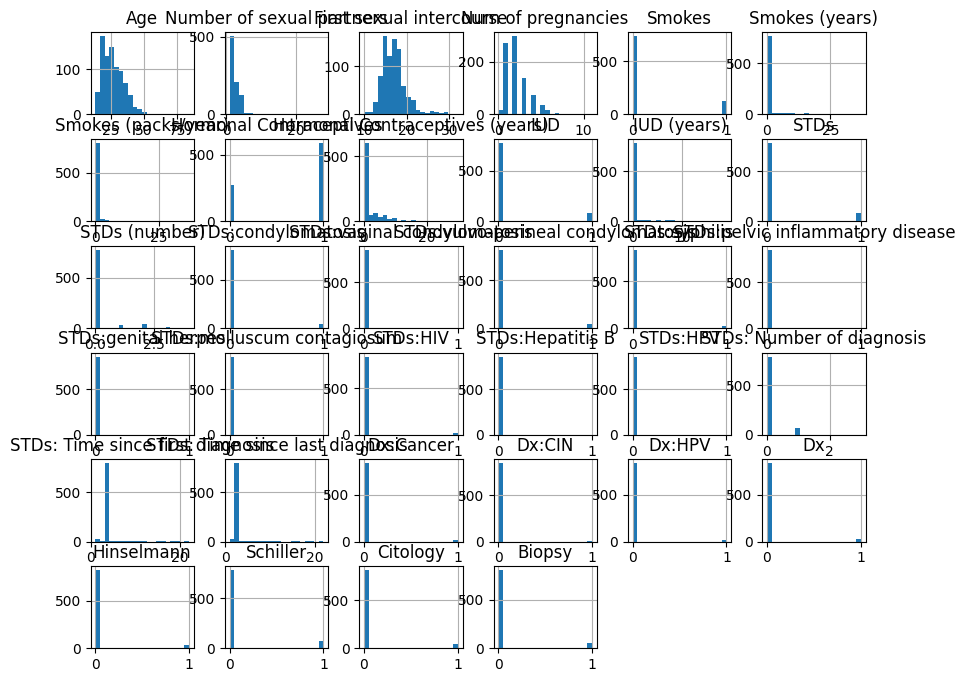

In [120]:
# Histograma para variables numéricas
X.hist(figsize=(10, 8), bins=20)
plt.show()

# Distribución para variables categóricas
for column in X.select_dtypes(include=['object']).columns:
    print(X[column].value_counts())
    X[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()


# Análisis de correlación
Se realizó un mapa de calor que nos permitió ver de mejor forma la correlación entre las variables. Un dato interesante es que las personas diagnosticadas con papiloma humano tienen muy alta relación con las que tiene diagnosticado el cancer.

                                         Age  Number of sexual partners  \
Age                                 1.000000                   0.085971   
Number of sexual partners           0.085971                   1.000000   
First sexual intercourse            0.369175                  -0.145847   
Num of pregnancies                  0.525892                   0.077439   
Smokes                              0.057204                   0.236858   
Smokes (years)                      0.218261                   0.175729   
Smokes (packs/year)                 0.131861                   0.174968   
Hormonal Contraceptives             0.029201                   0.004027   
Hormonal Contraceptives (years)     0.295267                   0.021188   
IUD                                 0.279429                   0.032460   
IUD (years)                         0.215427                   0.006252   
STDs                                0.025241                   0.055370   
STDs (number)            

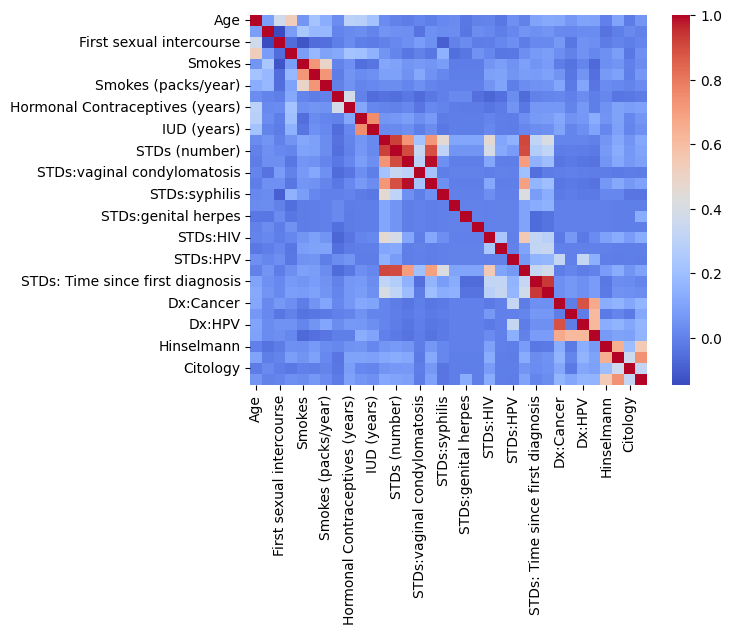

In [121]:
# Matriz de correlación
correlation_matrix = X.corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [122]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
2,34,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,4.0,3.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,4.0,3.0,0,0,0,0,0,0,0,0


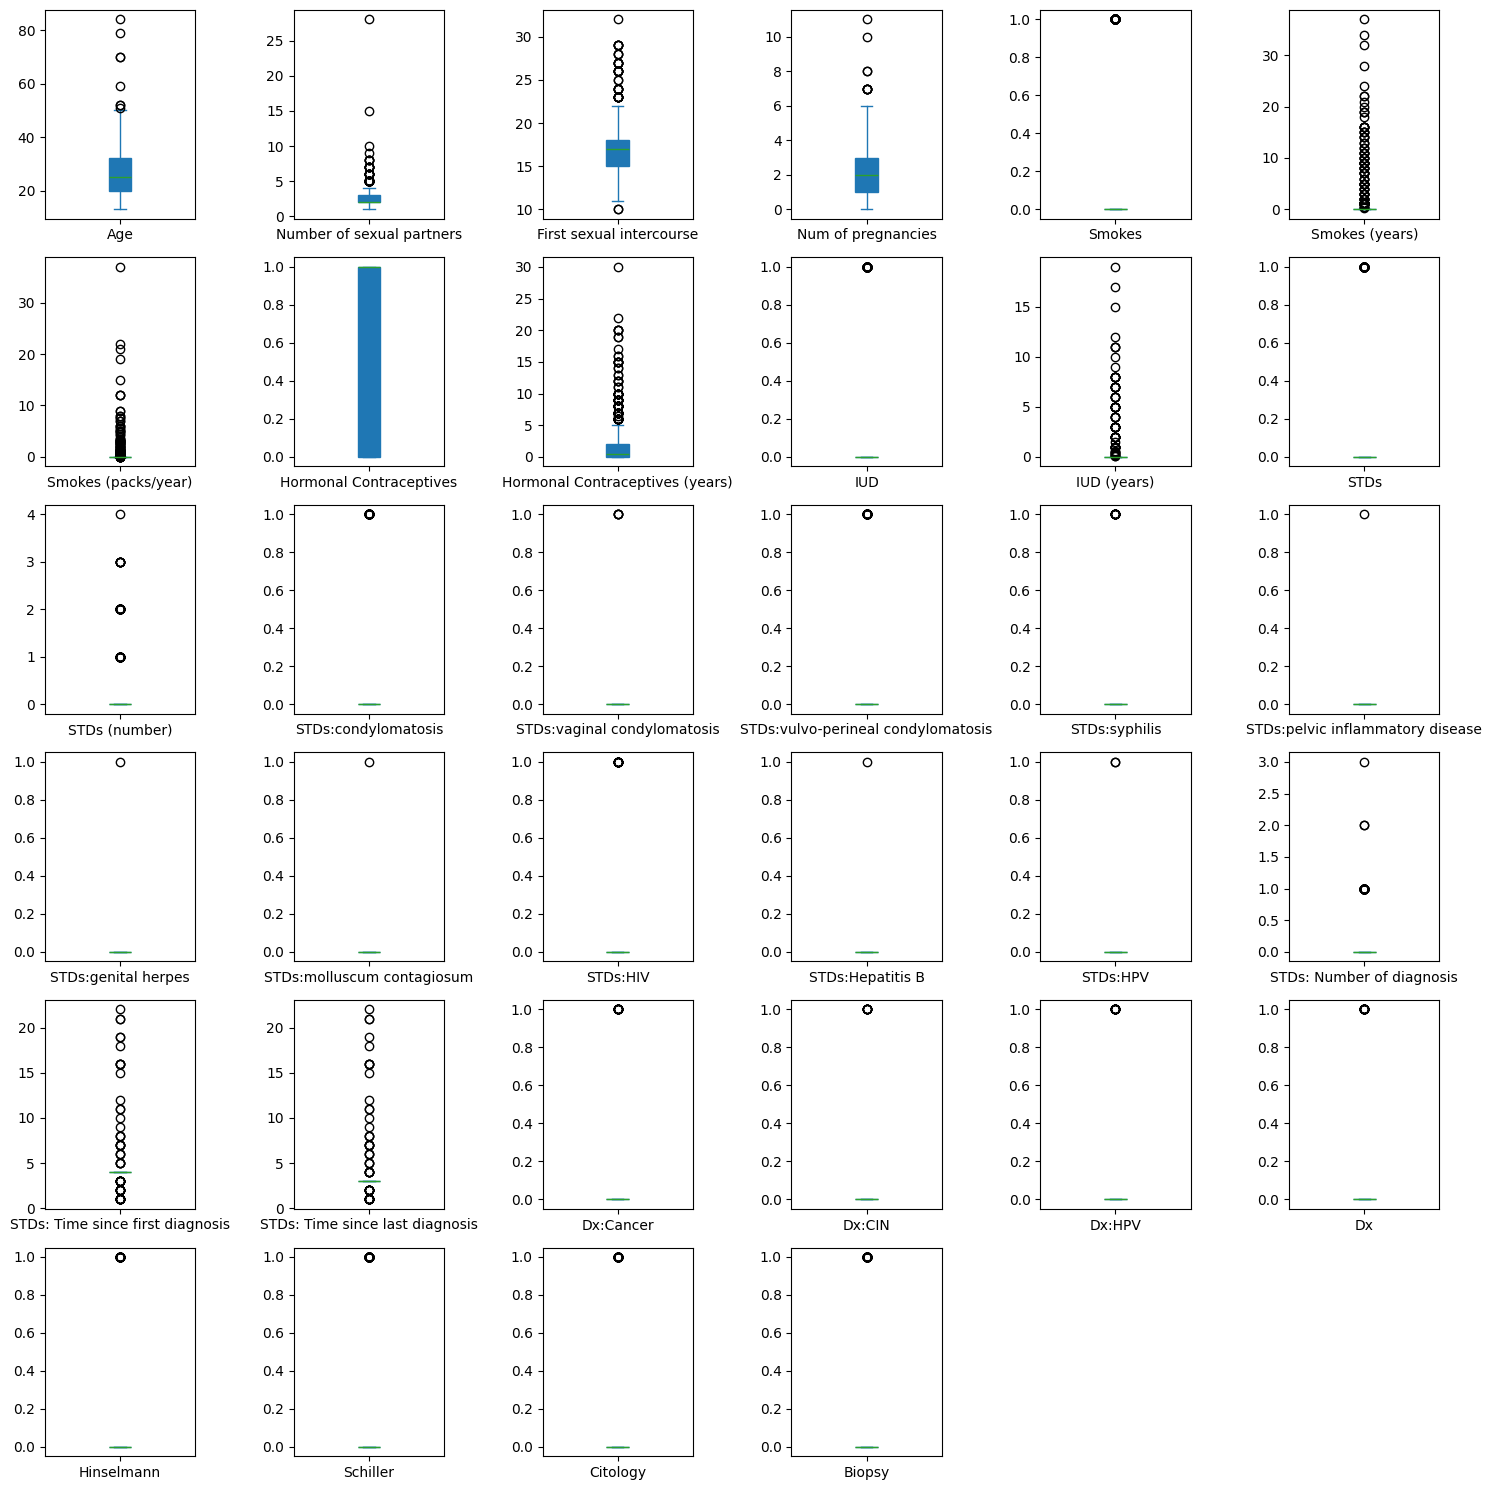

In [123]:
# Boxplot para detectar valores atípicos
X.plot(kind='box', subplots=True, layout=(6, 6), figsize=(15, 15), patch_artist=True)
plt.tight_layout()
plt.show()

## Otras curiosidades

- Al realizar la categorización de todas las variables que están incluidas dentro del Set de datos, se pudo verificar que como tal, no hay ninguna variable cualitativa que sea categórica. Esto debido a que todas las variables de este tipo se basan en dividir cada una de ellas en Sí o No, y no en especificar tipos específicos de ETS, por ejemplo. Es por ello que se decidió que todas las variables cualitativas son de índole dicotómica, debido a que no poseen más de 3 valores posibles.

- Teniendo en cuenta que todas las variables cualitativas son dicotómicas y que también ya están representadas con valores numéricos, se puede incluso estipular que no tendrán un gran impacto dentro de un PCA. Como tal, incluso se puede decir que valdrán la pena, solo sabiendo si estas mismas poseen una relevancia significativa en la variabilidad del conjunto de datos.

### Hacemos el test de Esfericidad de Bartlett

H0: La matriz de correlación es igual a la matriz identidad

Dado que el valor p es mucho menor que el nivel de significancia comúnmente utilizado (por ejemplo, 0.05), podemos rechazar la hipótesis nula. Esto sugiere que la matriz de correlación de los datos es significativamente diferente de la matriz identidad, indicando que hay correlaciones significativas entre tus variables.

In [124]:
X_num = X[variables_numericas]
chi_cuadrado, p_valor = calculate_bartlett_sphericity(X_num)
chi_cuadrado, p_valor

(np.float64(4751.429298561807), np.float64(0.0))

### Ver el índice KMO
El índice KMO (Kaiser-Meyer-Olkin) es una medida de adecuación muestral que evalúa la idoneidad de los datos para el análisis factorial. Este índice varía entre 0 y 1, donde valores más altos indican que es más adecuado realizar un análisis factorial.



En este caso el índice KMO de 0.61 sugiere que el conjunto de datos, tal como está, puede no ser ideal para un análisis factorial, pero igual es algo aceptable.  Probablemente esto nos indique que no vamos a tener buenos resultados haciendo el PCA, no obstante vamos a seguir.

In [127]:
kmo,kmo_modelo = calculate_kmo(X)
kmo_modelo

c:\Users\danar\Documents\Clases 2024-2\DS-lab1\.venv\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


np.float64(0.6102003802123349)

 ## Análisis de Componentes Principales

In [130]:
pca_pipe = make_pipeline(StandardScaler(),PCA()) #Se escalan los datos y luego se le aplica PCA
pca_pipe.fit(X) #Se ajusta el modelo
#Se extrae el modelo del pipeline
modelo_pca = pca_pipe.named_steps['pca']

#Se convierte el arreglo en data frame
pd.DataFrame(
    data = modelo_pca.components_,
    columns = X.columns,
    index = [f'PCA {i}' for i in range(1, len(X.columns)+1)]
)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
PCA 1,3.804275e-02,3.948393e-02,5.097392e-03,3.692062e-02,8.226686e-02,8.766179e-02,5.280829e-02,-2.543988e-02,1.795680e-02,5.402546e-02,...,2.026093e-01,2.260930e-01,2.393400e-02,9.330122e-03,2.312822e-02,1.763806e-02,6.997514e-02,1.102289e-01,5.611448e-02,9.441259e-02
PCA 2,2.136567e-01,5.070921e-02,4.086433e-02,1.512657e-01,7.177502e-02,1.404126e-01,1.303447e-01,4.305097e-02,1.372088e-01,1.771026e-01,...,6.007258e-02,6.033040e-02,4.161371e-01,1.195818e-01,4.045556e-01,3.646822e-01,2.331141e-01,2.865834e-01,1.587354e-01,2.804239e-01
PCA 3,1.975129e-01,1.986235e-01,-6.251457e-02,2.084862e-01,4.316573e-01,4.832233e-01,4.294842e-01,5.054878e-02,9.321230e-02,2.737086e-02,...,1.395894e-01,1.419864e-01,-1.151488e-01,-7.865462e-02,-1.061651e-01,-1.759892e-01,-1.520703e-01,-1.583843e-01,-1.320509e-01,-1.793881e-01
PCA 4,-6.075926e-02,3.559710e-02,-8.080604e-02,4.139810e-03,1.913420e-01,1.951159e-01,1.512528e-01,-1.610670e-02,2.165546e-02,-6.582976e-02,...,-3.311312e-01,-3.198129e-01,-1.847342e-01,-1.469006e-01,-1.719257e-01,-2.531015e-01,3.546554e-01,3.731049e-01,1.945537e-01,3.441338e-01
PCA 5,3.846747e-01,-4.602248e-02,1.371898e-01,3.330189e-01,-1.868170e-01,-1.242433e-01,-1.496195e-01,1.071815e-01,2.232350e-01,4.787025e-01,...,-7.382583e-02,-6.425323e-02,-1.570111e-01,-2.710779e-02,-1.862304e-01,-1.146208e-01,-4.967522e-02,-2.624297e-03,-6.343106e-02,-4.338255e-02
PCA 6,2.222757e-03,-7.329320e-02,-2.286384e-02,3.195345e-02,-1.173610e-01,-1.243078e-01,-1.386957e-01,1.633389e-02,6.101918e-02,-1.670481e-02,...,3.856634e-01,3.663054e-01,-2.598288e-01,8.579129e-03,-2.553191e-01,-1.712139e-01,1.992591e-01,2.431007e-01,1.460260e-01,2.210822e-01
PCA 7,1.825001e-01,-5.884538e-02,1.942004e-01,1.763299e-01,-5.214031e-02,-7.777253e-02,-8.372113e-02,4.703612e-01,4.696350e-01,-3.428502e-01,...,1.322622e-02,2.566790e-02,4.614551e-02,-1.949411e-01,8.614559e-02,-1.381994e-01,1.305923e-02,-1.235935e-03,1.926423e-02,-8.301527e-03
PCA 8,9.437339e-02,-2.373863e-01,4.650416e-01,-2.220374e-01,-2.675085e-02,7.554807e-02,7.353502e-02,-1.699383e-01,-9.146447e-02,2.839923e-02,...,1.171514e-01,9.795744e-02,8.370651e-02,-3.949265e-01,7.278704e-02,-2.142535e-01,1.564604e-02,2.728333e-02,5.959185e-02,-1.709231e-02
PCA 9,2.319567e-01,-6.872637e-02,3.391233e-01,3.428244e-03,1.898036e-02,8.269961e-02,6.166165e-02,-1.331313e-02,3.737475e-02,-1.815493e-01,...,-9.722927e-03,-1.493752e-02,-1.860013e-01,6.197243e-01,-1.845355e-01,2.857164e-01,-5.514616e-02,-1.600752e-02,-4.900723e-02,8.651727e-02
PCA 10,-2.895208e-01,1.691167e-01,-3.415840e-01,-2.316989e-01,5.751002e-02,-1.273179e-02,2.351457e-02,3.752949e-01,2.518933e-01,1.439695e-01,...,1.260001e-01,1.077378e-01,-4.549420e-02,1.320973e-01,-4.597713e-02,5.691484e-02,-3.786997e-02,-3.014687e-02,1.188725e-01,-1.222130e-02


#### Representación de cada variable en las diferentes componentes

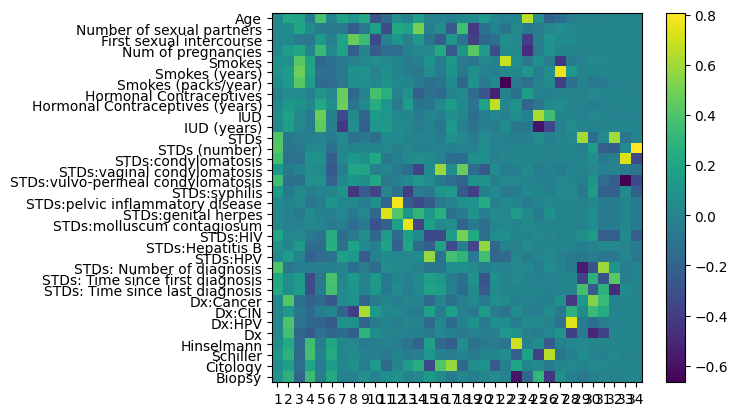

In [131]:
fig, ax = plt.subplots(nrows=1, ncols=1)
componentes = modelo_pca.components_
plt.imshow(componentes.T)
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X.columns)), np.arange(modelo_pca.n_components_)+1)
plt.grid(False)
plt.colorbar();

#### Porcentaje de la varianza explicada por cada componente

In [132]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.15128827 0.0933231  0.07373112 0.0664864  0.05939041 0.05676821
 0.0454216  0.04000312 0.03795691 0.03628126 0.03137578 0.0305246
 0.02960503 0.02749295 0.02564421 0.02480457 0.02391533 0.0233795
 0.02191553 0.01920606 0.0168206  0.01403996 0.01206622 0.00833185
 0.0071512  0.00641025 0.00511021 0.00365132 0.00264486 0.00222058
 0.00193657 0.00086455 0.00023785 0.        ]


#### Scree plot

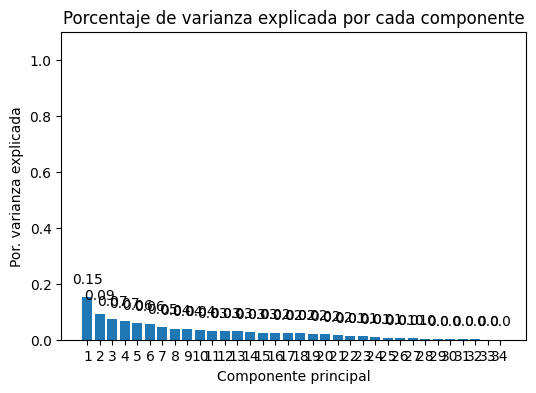

In [134]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.15128827 0.24461137 0.3183425  0.3848289  0.44421931 0.50098752
 0.54640912 0.58641225 0.62436916 0.66065042 0.6920262  0.7225508
 0.75215583 0.77964877 0.80529298 0.83009755 0.85401288 0.87739239
 0.89930791 0.91851397 0.93533456 0.94937453 0.96144075 0.9697726
 0.9769238  0.98333404 0.98844426 0.99209558 0.99474044 0.99696102
 0.9988976  0.99976215 1.         1.        ]


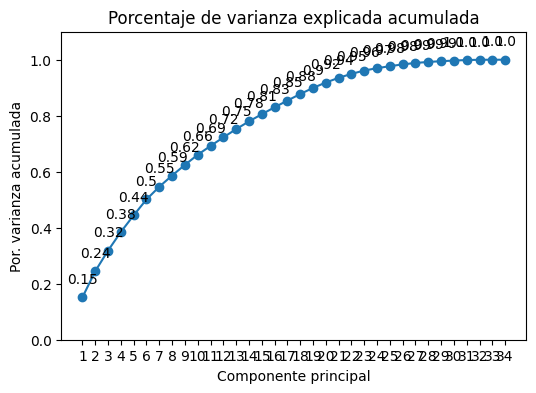

In [135]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

#### Discretizamos las variables númericas en categorias.

In [149]:
# Se discretiza las variables 
X_disc = X.copy()

# Se discretizan en tres categorías, baja, media y alta
# Lo que se hace es dividir el rango de valores en tres partes iguales
for col in X_disc.columns:
    if X_disc[col].nunique() > 2:  # Asegúrate de que hay más de 2 valores únicos
        try:
            bins = np.linspace(X_disc[col].min(), X_disc[col].max(), 4)  # Define 3 intervalos
            labels = ['baja', 'media', 'alta']
            X_disc[col] = pd.cut(X_disc[col], bins=bins, labels=labels, include_lowest=True)
        except ValueError as e:
            print(f"Error discretizando la columna {col}: {e}")
    else:
        # Si la columna tiene 2 o menos valores únicos, no se discretiza
        continue

X_disc.head()


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,baja,baja,baja,baja,0.0,baja,baja,0.0,baja,0.0,...,baja,baja,0,0,0,0,0,0,0,0
1,baja,baja,baja,baja,0.0,baja,baja,0.0,baja,0.0,...,baja,baja,0,0,0,0,0,0,0,0
2,baja,baja,baja,baja,0.0,baja,baja,0.0,baja,0.0,...,baja,baja,0,0,0,0,0,0,0,0
3,media,baja,baja,media,1.0,alta,alta,1.0,baja,0.0,...,baja,baja,1,0,1,0,0,0,0,0
4,media,baja,media,media,0.0,baja,baja,1.0,media,0.0,...,baja,baja,0,0,0,0,0,0,0,0


In [157]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Convertir el DataFrame en formato transacción
def df_to_transactions(df):
    transactions = []
    for index, row in df.iterrows():
        transaction = [f'{col}_{val}' for col in df.columns if row[col] != '']
        transactions.append(transaction)
    return transactions

transactions = df_to_transactions(X_disc)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

print("Transacciones:")
# Encontrar itemsets frecuentes
frequent_itemsets = apriori(df_trans, min_support=0.3, use_colnames=True, low_memory=True, max_len=10)

# Generar reglas
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules_filtered = rules[(rules['support'] < 1) & (rules['confidence'] < 1) & (rules['lift'] < 1)]

print("Reglas de asociación:")
print(rules_filtered)


Transacciones:


In [ ]:
# Hacer el requiremens.txt
!pip freeze > requirements.txt